In [1]:
import cv2
import numpy as np
from astropy.io import fits 
import matplotlib.pyplot as plt

datasets=[
'o9073g0267o.1655422.ch.2328134.XY51.p10.fits',
'o9073g0283o.1655438.ch.2328150.XY51.p10.fits',
'o9073g0299o.1655454.ch.2328166.XY51.p10.fits',
'o9073g0315o.1655470.ch.2328182.XY51.p10.fits',
]

datos=fits.open(datasets[0])
img=datos[0].data


In [ ]:
import plotly.express as px
img=np.clip(img,100,200)

# plt.imshow(img,cmap='gray_r')
fig = plt.imshow(img,color_continuous_scale='gray')
fig.show()

# Delete Horizontal Lines


In [54]:
created=False

for i in range(img.shape[0]):

  if np.std([img[i,:]])>10: 

    if not created:
      new_img = img[i,:]
      created = True
    else:
      new_img = np.vstack((new_img,img[i,:]))

  # else:
  #   print('-----------')
  #   print(i)
  #   print(np.std([img[i,:]]))
# 

In [55]:
# fig = px.imshow(new_img,color_continuous_scale='gray')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Delete Vertical lines


In [80]:
# img = new_img
created=False

for i in range(new_img.shape[1]):

  if np.std([new_img[:,i]])>10: 
    # pass
    if not created:
      new_img_2 = new_img[:,i].reshape(-1,1)
      created = True
    else:
      new_img_2 = np.hstack((new_img_2,new_img[:,i].reshape(-1,1)))
  # else:
    # print('-----------')
    # print(i)
    # print(np.std([new_img[:,i]]))

In [88]:
fig = px.imshow(new_img_2,color_continuous_scale='gray_r')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Resumen


In [83]:
def remove_lines(img):
  
  # Remove Horizontal lines

  created=False

  for i in range(img.shape[0]):

    if np.std([img[i,:]])>10: 

      if not created:
        new_img = img[i,:]
        created = True
      else:
        new_img = np.vstack((new_img,img[i,:]))

  # Remove Vertical lines

  created=False

  for i in range(new_img.shape[1]):

    if np.std([new_img[:,i]])>10: 
      # pass
      if not created:
        new_img_2 = new_img[:,i].reshape(-1,1)
        created = True
      else:
        new_img_2 = np.hstack((new_img_2,new_img[:,i].reshape(-1,1)))

  return new_img_2

In [86]:
datos=fits.open(datasets[1])
img=datos[0].data
img=np.clip(img,100,200)

filtered_img=remove_lines(img)

In [87]:
fig = px.imshow(filtered_img,color_continuous_scale='gray')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

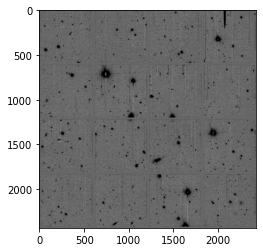

In [93]:
plt.imshow(img,cmap='gray_r')


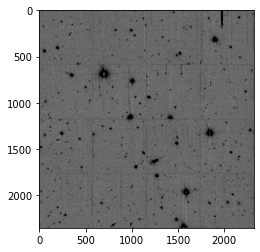

In [92]:
plt.imshow(filtered_img,cmap='gray_r')

# Prev

In [ ]:
imgs=[[None, None, None, None],
      [None, None, None, None],
      [None, None, None, None],
      [None, None, None, None]]


for i in range(4):
 
  imgs[i][0]=img[int(img.shape[0]*i/4):int(img.shape[0]*(i+1)/4),int(img.shape[1]*0/4):int(img.shape[1]*1/4)]
  imgs[i][1]=img[int(img.shape[0]*i/4):int(img.shape[0]*(i+1)/4),int(img.shape[1]*1/4):int(img.shape[1]*2/4)]
  imgs[i][2]=img[int(img.shape[0]*i/4):int(img.shape[0]*(i+1)/4),int(img.shape[1]*2/4):int(img.shape[1]*3/4)]
  imgs[i][3]=img[int(img.shape[0]*i/4):int(img.shape[0]*(i+1)/4),int(img.shape[1]*3/4):int(img.shape[1]*4/4)]



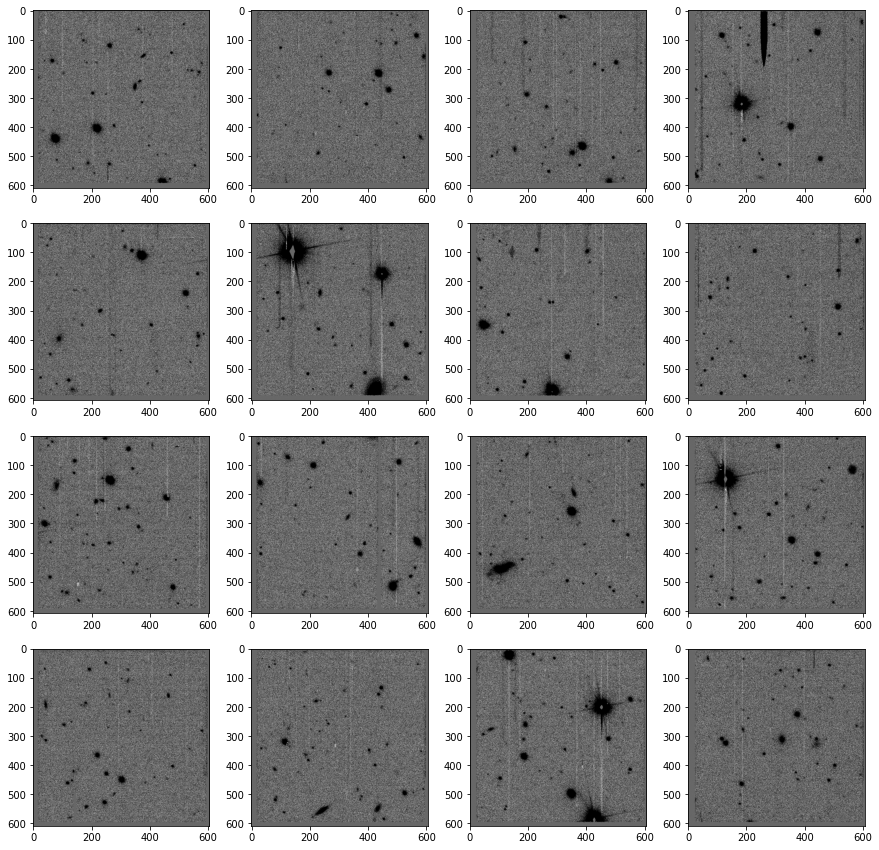

In [ ]:
fig, arreglo_plots = plt.subplots(4,4, figsize=(15, 15))

for i in range(4):
  for j in range(4):
    arreglo_plots[i,j].imshow(imgs[i][j],cmap='gray_r')

In [ ]:
def combine_imgs(img1,img2):
  height, width = img1.shape


  # Create ORB detector with 5000 features.
  orb_detector = cv2.ORB_create(5000)

  # Find keypoints and descriptors.
  # The first arg is the image, second arg is the mask
  #  (which is not reqiured in this case).
  kp1, d1 = orb_detector.detectAndCompute(img1, None)
  kp2, d2 = orb_detector.detectAndCompute(img2, None)


  # Match features between the two images.
  # We create a Brute Force matcher with 
  # Hamming distance as measurement mode.
  matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

  # Match the two sets of descriptors.
  matches = matcher.match(d1, d2)

  # Sort matches on the basis of their Hamming distance.
  matches.sort(key = lambda x: x.distance)

  # Take the top 90 % matches forward.
  matches = matches[:int(len(matches)*90)]
  no_of_matches = len(matches)

  # Define empty matrices of shape no_of_matches * 2.
  p1 = np.zeros((no_of_matches, 2))
  p2 = np.zeros((no_of_matches, 2))

  for i in range(len(matches)):
    p1[i, :] = kp1[matches[i].queryIdx].pt
    p2[i, :] = kp2[matches[i].trainIdx].pt

  # Find the homography matrix.
  homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)


  # Use this matrix to transform the
  # colored image wrt the reference image.
  transformed_img = cv2.warpPerspective(img1,
                      homography, (width, height))
  
  return transformed_img


In [ ]:
for i in range(4):
  for j in range(4):
    imgs[i][j]=np.array(imgs[i][j],np.uint8)

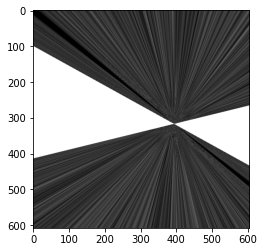

In [ ]:
transformed_img=combine_imgs(imgs[0][0],imgs[0][1])
plt.imshow(transformed_img,cmap='gray_r')

In [ ]:
p1.shape

(1316, 2)